In [82]:
import os 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [83]:
data_path ='./data/raw'
def read_data(partition):
  data = []
  for fn in os.listdir(os.path.join(data_path, partition)):
    with open(os.path.join(data_path, partition, fn)) as f:
      try:
        data.append(pd.read_csv(f, index_col=None))
      except Exception:
          pass
  return pd.concat(data) 

df_ph= read_data('pH')
df_tmp= read_data('temp')


In [84]:
drops = []
for i , seq in enumerate(df_ph['seq']) :
    if type(seq) != str:
        drops.append(i)
df_ph =df_ph.drop(df_ph.index[drops])

In [85]:
drops = []
for i , seq in enumerate(df_tmp['seq']) :
    if type(seq) != str:
        drops.append(i)
df_tmp =df_tmp.drop(df_tmp.index[drops])

In [86]:
df_tmp['seq_char_count']= df_tmp['seq'].apply(lambda x: len(x))
df_tmp['label']= df_tmp['OptTemp'].apply(lambda x: 1 if (float(x) > 40) else 0 if (float(x)<=40 and float(x)>=25) else 1)

df_ph['seq_char_count']= df_ph['seq'].apply(lambda x: len(x))
df_ph['label']= df_ph['OptpH'].apply(lambda x: 1 if (float(x) > 8) else 0 if ( float(x)<=8 and float(x)>=6) else 1)


def plot_data(df, column, data_name):
  sns.distplot(df[column].values)
  plt.title(f'plot of : {data_name}')
  plt.grid(True)


/home/mohre/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


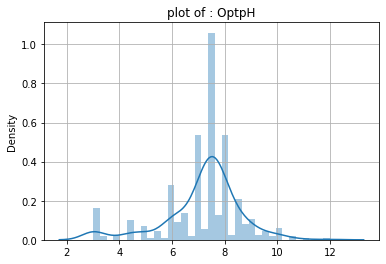

In [87]:
plot_data(df_ph, 'OptpH','OptpH')


/home/mohre/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


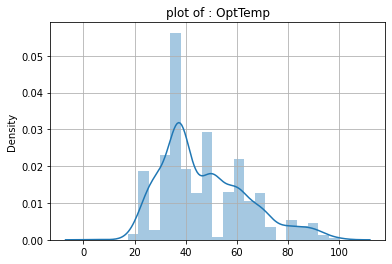

In [88]:
plot_data(df_tmp, 'OptTemp','OptTemp')

In [89]:
df_ph.to_csv(os.path.join(data_path,'ph.csv'))
df_tmp.to_csv(os.path.join(data_path,'tmp.csv'))


In [90]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1

  return char_dict

char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))

{'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}
Dict Length: 20


In [91]:
def integer_encoding(data):
  """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
  """
  
  encode_list = []
  for row in data['seq'].values:
    row_encode = []
    for code in row:
      row_encode.append(char_dict.get(code, 0))
    encode_list.append(np.array(row_encode))
  data["encode"] =  encode_list
  return data
  
df_ph = integer_encoding(df_ph) 
df_tmp = integer_encoding(df_tmp) 


In [ ]:
!pip install tensorflow-cpu